In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
movieData = pd.read_csv("/kaggle/input/movie-lens-dataset/movies.csv")  # reads data from movies.csv
ratingData = pd.read_csv("/kaggle/input/movie-lens-dataset/ratings.csv")  # reads data from ratings.csv

In [3]:
mergeData = pd.merge(ratingData, movieData, on='movieId')  # performs inner merge using movieId as primary key
mergeData2 = pd.merge(ratingData, movieData, on='movieId')  # performs inner merge using movieId as primary key
mergeData = mergeData.drop(['timestamp', 'genres'], axis=1)  # drops timestamp and genre columns

In [4]:
userMatrix = mergeData.pivot_table(index='userId', columns='movieId', values='rating')  # creates the matrix
train_data, test_data = train_test_split(userMatrix, test_size=0.2, random_state=42)  # train data, and test data states

In [5]:
similarity = cosine_similarity(train_data.T.fillna(0))  # calculates similarity between two non-zero vectors
np.fill_diagonal(similarity, 0)  # ignores self-similarity when comparing items in the matrix

In [6]:
ratings = pd.DataFrame(mergeData.groupby('title')['rating'].mean())  # creates dataframe for visuals
ratings['num of ratings'] = pd.DataFrame(mergeData.groupby('title')['rating'].count())  # numerical count of ratings
genre_counts = mergeData2['genres'].value_counts()  # numerical count of total movies per genre

Text(0.5, 1.0, 'Distribution of Number of Ratings per Movie')

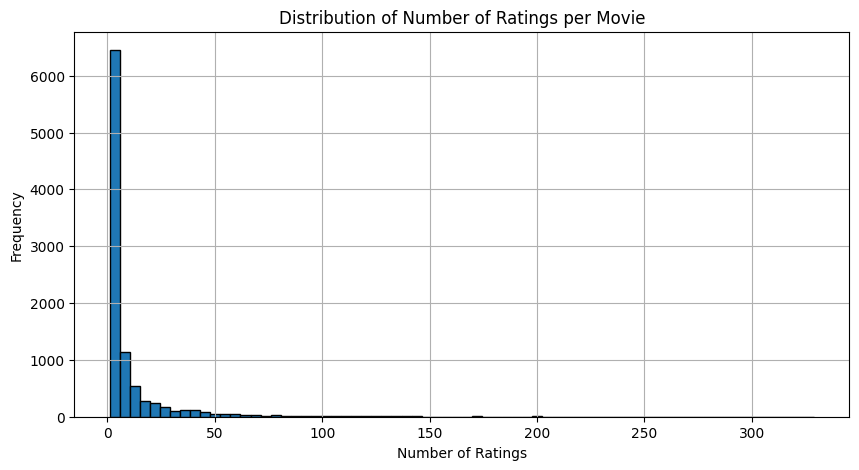

In [7]:
plt.figure(figsize=(10,5))  # size of visual graph
ratings['num of ratings'].hist(bins=70, edgecolor = 'black')  # creates histograph with ratings dataframe
plt.xlabel('Number of Ratings')  # x-axis label
plt.ylabel('Frequency')  # y-axis label
plt.title('Distribution of Number of Ratings per Movie')  # title of visual graph

Text(0.5, 1.0, 'Distribution of Rating Scores')

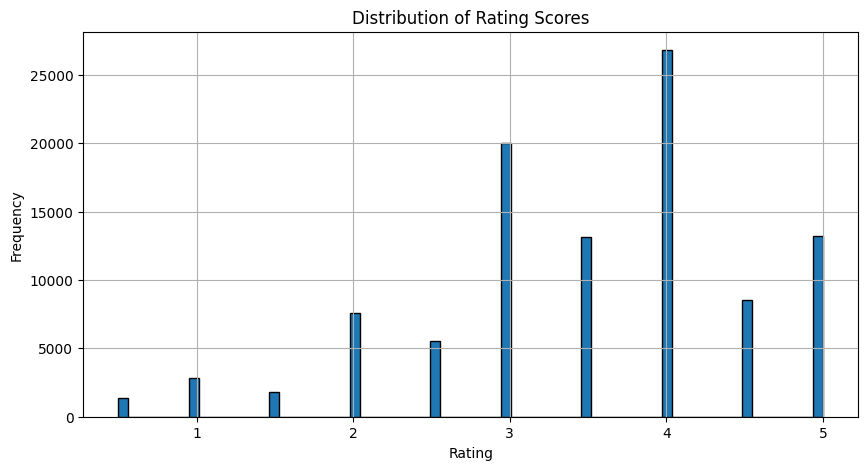

In [8]:
plt.figure(figsize=(10,5))  # size of visual graph
ratingData['rating'].hist(bins=70, edgecolor = 'black')  # creates histogram with ratingData
plt.xlabel('Rating')  # x-axis label
plt.ylabel('Frequency')  # y-axis label
plt.title('Distribution of Rating Scores')  # title of visual graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Drama'),
  Text(2, 0, 'Comedy|Romance'),
  Text(3, 0, 'Comedy|Drama|Romance'),
  Text(4, 0, 'Comedy|Drama'),
  Text(5, 0, 'Drama|Romance'),
  Text(6, 0, 'Action|Adventure|Sci-Fi'),
  Text(7, 0, 'Crime|Drama'),
  Text(8, 0, 'Action|Crime|Thriller'),
  Text(9, 0, 'Action|Adventure|Thriller'),
  Text(10, 0, 'Action|Adventure|Sci-Fi|Thriller'),
  Text(11, 0, 'Drama|Thriller'),
  Text(12, 0, 'Action|Sci-Fi|Thriller'),
  Text(13, 0, 'Comedy|Crime'),
  Text(14, 0, 'Crime|Drama|Thriller'),
  Text(15, 0, 'Drama|War'),
  Text(16, 0, 'Action|Drama|War'),
  Text(17, 0, 'Action|Crime|Drama|Thriller'),
  Text(18, 0, 'Documentary'),
  Text(19, 0, 'Drama|Mystery|Thriller'),
  Text(20, 0, 'Action|Sci-Fi'),
  Text(21, 0, 'Action|Comedy'),
  Text(22, 0, 'Action|Thriller'),
  Text(23, 0, 'Action|A

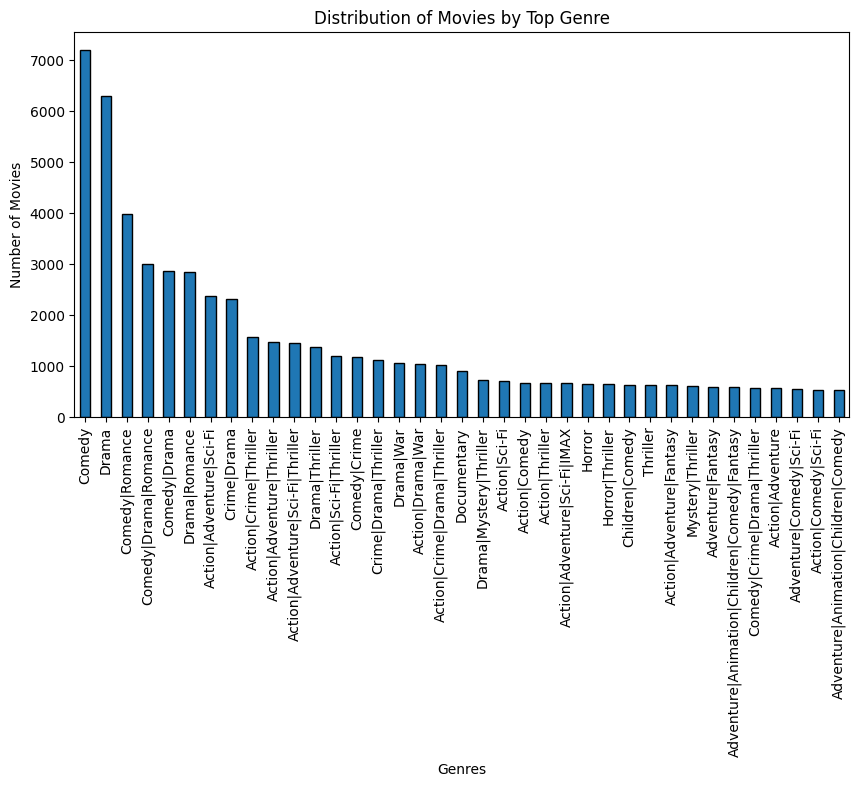

In [9]:
genre_counts = genre_counts[genre_counts > 500]  # ensures graph only shows genres with a movie count > 500
plt.figure(figsize=(10, 5))  # size of visual graph
genre_counts.plot(kind='bar', edgecolor='black')  # creates graph
plt.xlabel('Genres')  # x-axis label
plt.ylabel('Number of Movies')  # y-axis label
plt.title('Distribution of Movies by Top Genre')  # title of visual graph
plt.xticks(rotation=90)  # rotates genre text for visibility

In [10]:
def get_recommendations(user_id, train_data, similarity, movieData, top_n=5):
    
    # gets the user ratings and similar movies
    user_ratings = train_data.loc[user_id].fillna(0).values
    similarity_scores = similarity.dot(user_ratings)

    # sorts movies based on similarity scores
    movie_ids = train_data.columns
    sorted_indices = np.argsort(similarity_scores)[::-1]
    top_indices = sorted_indices[:top_n]

    # gets movieId and movie titles
    recommended_movie_ids = movie_ids[top_indices]
    recommended_movies = movieData[movieData['movieId'].isin(recommended_movie_ids)]

    # return topN recommended movies
    return recommended_movies

In [11]:
class Main:
    
    # constructor method
    def __init__(self, train_data, similarity, movieData):
        self.train_data = train_data
        self.similarity = similarity
        self.movieData = movieData
        print("Welcome to the Movie Recommender System!")
        self.run()

    # user gui
    def run(self):
        while True:
            try:
                user_id_input = int(input("Enter your user ID for personalized movie recommendations: "))
                if user_id_input not in self.train_data.index:
                    print("User ID not found. Please enter a valid user ID.")
                    continue

                recommendations = get_recommendations(user_id_input, self.train_data, self.similarity, self.movieData, 
                                                      top_n=5)
                print("Recommended movies:")
                print(recommendations[['title', 'genres']])
            except ValueError:
                print("Invalid input. Please enter a numeric user ID.")

In [ ]:
if __name__ == "__main__":  # ensures main class runs only when the script is executed directly
    Main(train_data, similarity, movieData)

Welcome to the Movie Recommender System!


Enter your user ID for personalized movie recommendations:  5


Recommended movies:
                    title                                    genres
314   Forrest Gump (1994)                  Comedy|Drama|Romance|War
337      True Lies (1994)  Action|Adventure|Comedy|Romance|Thriller
398  Fugitive, The (1993)                                  Thriller
418  Jurassic Park (1993)          Action|Adventure|Sci-Fi|Thriller
509         Batman (1989)                     Action|Crime|Thriller


Enter your user ID for personalized movie recommendations:  6


Recommended movies:
                          title                genres
49        Big Green, The (1995)       Children|Comedy
169         Three Wishes (1995)         Drama|Fantasy
310             Crooklyn (1994)          Comedy|Drama
317  I Like It Like That (1994)  Comedy|Drama|Romance
662              Carpool (1996)          Comedy|Crime


Enter your user ID for personalized movie recommendations:  87


User ID not found. Please enter a valid user ID.


Enter your user ID for personalized movie recommendations:  9898


User ID not found. Please enter a valid user ID.


Enter your user ID for personalized movie recommendations:  8


Recommended movies:
                    title                                    genres
123      Apollo 13 (1995)                      Adventure|Drama|IMAX
337      True Lies (1994)  Action|Adventure|Comedy|Romance|Thriller
398  Fugitive, The (1993)                                  Thriller
418  Jurassic Park (1993)          Action|Adventure|Sci-Fi|Thriller
509         Batman (1989)                     Action|Crime|Thriller


Enter your user ID for personalized movie recommendations:  6


Recommended movies:
                          title                genres
49        Big Green, The (1995)       Children|Comedy
169         Three Wishes (1995)         Drama|Fantasy
310             Crooklyn (1994)          Comedy|Drama
317  I Like It Like That (1994)  Comedy|Drama|Romance
662              Carpool (1996)          Comedy|Crime
